In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
cantonKeys = ['AG','AI','AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU', 'NE', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'TI', 'UR', 'VD', 'VS', 'ZG','ZH']
cantonNames = ['aargau','appenzell-innerrhoden','appenzell-ausserrhoden','bern','basel-Landschaft','basel city','freiburg','genf','glarus','graubuenden','jura','lucerne','neuenburg','nidwalden','obwalden','sankt-gallen','schaffhausen','solothurn','schwyz','thurgau','ticino','uri','waadt','wallis','zug','zurich']


,sub_region_2,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,,,,
Aargau,0.0,0.0,0.0,-8762.0,-153.0,14334.0,-7669.0,-8461.0,3195.0
Appenzell Ausserrhoden,0.0,0.0,0.0,-1229.0,273.0,0.0,-5542.0,-5691.0,978.0
Appenzell Innerrhoden,0.0,0.0,0.0,-211.0,0.0,0.0,0.0,-4322.0,0.0
Basel City,0.0,0.0,0.0,-15922.0,-4072.0,-4154.0,-13074.0,-10322.0,3099.0
Basel-Landschaft,0.0,0.0,0.0,-8376.0,1246.0,1191.0,-7593.0,-8386.0,3016.0
Canton of Bern,0.0,0.0,0.0,-10804.0,-1092.0,14306.0,-9408.0,-7924.0,2967.0
Canton of Zug,0.0,0.0,0.0,-9460.0,19.0,0.0,-10301.0,-10042.0,3197.0
Fribourg,0.0,0.0,0.0,-11303.0,-114.0,7903.0,-8458.0,-8519.0,3120.0
Geneva,0.0,0.0,0.0,-15729.0,-2672.0,1761.0,-17370.0,-12001.0,4058.0


/Users/davidscherer/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


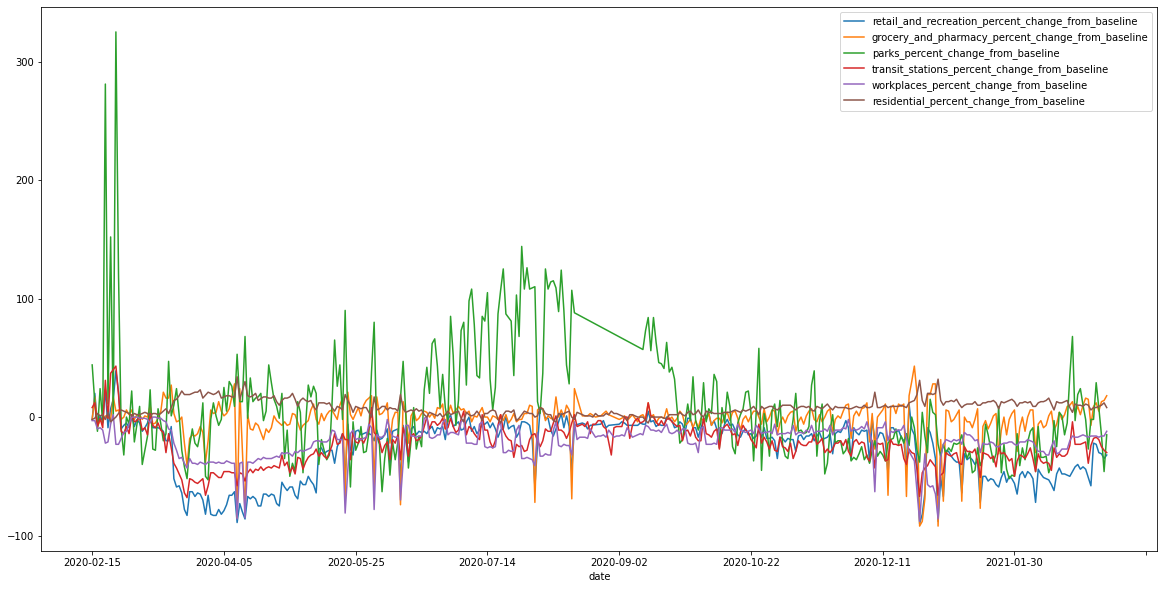

In [50]:
# exploring google mobility data
cantonComplete = pd.read_csv("data/GoogleMobility/2020_CH_Region_Mobility_Report.csv")
#cantonComplete.set_index(pd.DatetimeIndex(pd.to_datetime(cantonComplete.index)))

x = np.where(np.array(cantonKeys)=="LU")[0][0]
cantonGrouped = cantonComplete.groupby('sub_region_1')
display(cantonGrouped.sum())
interestedCanton = cantonGrouped.get_group(cantonNames[x].capitalize()).set_index('date')
interestedCols = ['retail_and_recreation_percent_change_from_baseline',
                  'grocery_and_pharmacy_percent_change_from_baseline',
                  'parks_percent_change_from_baseline',
                  'transit_stations_percent_change_from_baseline',
                  'workplaces_percent_change_from_baseline',
                  'residential_percent_change_from_baseline'
                 ]
interestedCanton[interestedCols].interpolate(method='linear').plot(kind='line', y=interestedCols, figsize=(20,10))
#.rolling(window=7).mean().rolling(window=7).mean()
plt.show()

#cantonalSelected
#pd.to_datetime(cantonComplete[['date']], format='%Y-%m-%d')
#pd.to_datetime(cantonComplete[['date']].values, format='%Y-%m-%d')
#cantonComplete[['date']].values.dtype


/Users/davidscherer/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='datum'>

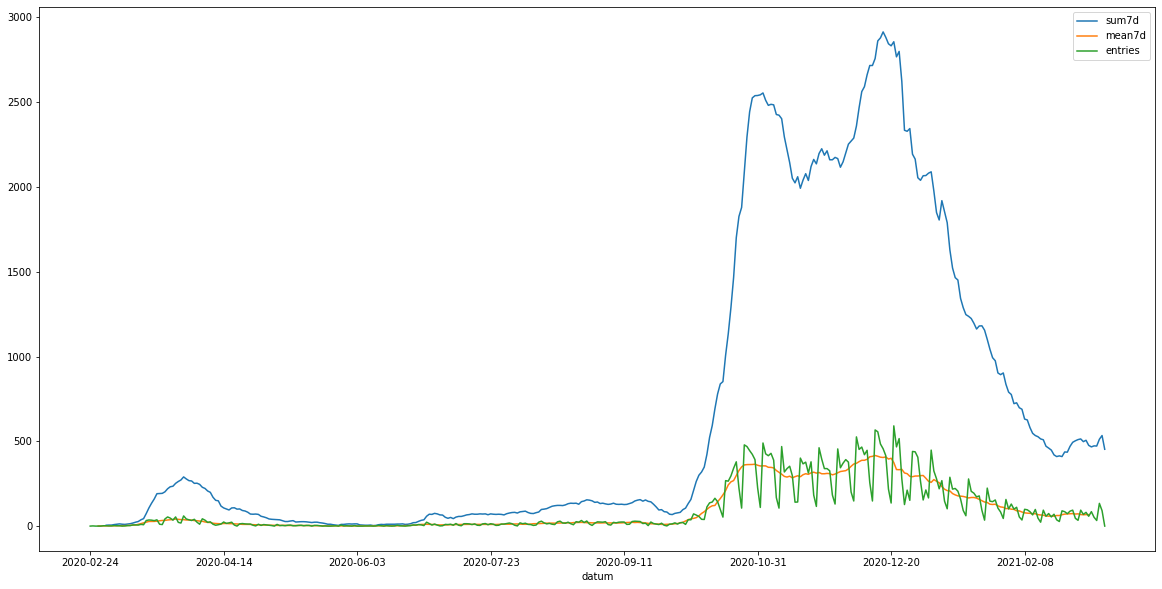

In [4]:
# exploring daily cases
cantonGrouped = pd.read_csv("data/FOPH/data/COVID19Cases_geoRegion.csv").groupby('geoRegion')
selectColumns = ['entries','sumTotal','sum7d','mean7d','pop','inz_entries','inzmean7d','inzsumTotal']
interestedCanton = cantonGrouped.get_group(cantonKeys[0]).set_index('datum')[selectColumns]
interestedCols = ['sum7d','mean7d','entries']
interestedCanton.plot(kind='line', y=interestedCols, figsize=(20,10))

/Users/davidscherer/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/davidscherer/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

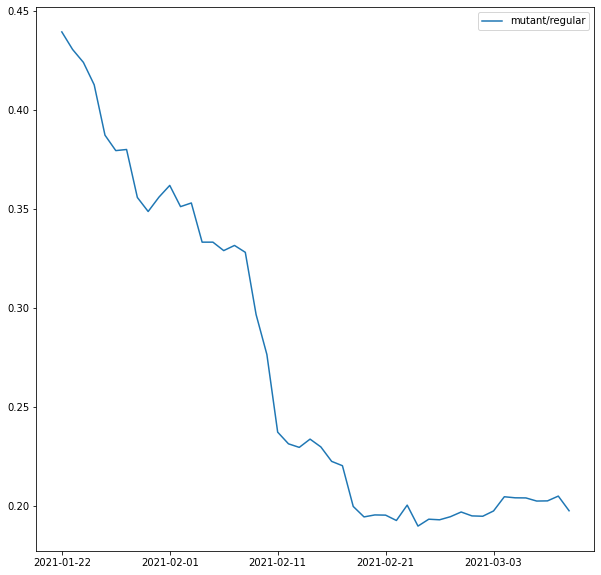

In [5]:
# exploring mutation
cantonGrouped = pd.read_csv("data/FOPH/data/COVID19Variants.csv").groupby('geoRegion')
# ,'entries','entries_pos','entries_neg','anteil_pos_mean7d','sumTotal'
selectColumns = ['entries','entries_pos','entries_neg']
interestedCanton = cantonGrouped.get_group(cantonKeys[0]) #.set_index(['date'])#[selectColumns] #.groupby('variant_type').sum()
mutants = ['B.1.1.7','S:N501Y_E484K','B.1.351','P.1','S:N501Y']
filterCol = interestedCanton['variant_type']
mutantDf = interestedCanton[(interestedCanton['entries'] != 0) & ((filterCol == 'B.1.1.7') | (filterCol == 'S:N501Y_E484K') | (filterCol == 'B.1.351') | (filterCol == 'P.1') | (filterCol == 'S:N501Y'))]
regularDf = interestedCanton[(interestedCanton['entries'] != 0) & ((filterCol != 'B.1.1.7') & (filterCol != 'S:N501Y_E484K') & (filterCol != 'B.1.351') & (filterCol != 'P.1') & (filterCol != 'S:N501Y'))]
d = mutantDf.groupby('date')[['entries']].sum()
f = regularDf.groupby('date')[['entries']].sum()
d.rename(columns = {'entries':'entriesMutant'}, inplace = True) 
f.rename(columns = {'entries':'entriesRegular'}, inplace = True) 
f = f[f['entriesRegular']!=0]
d = d[d['entriesMutant']!=0]
#d.plot(kind='line', y=['entries'], figsize=(10,10))

pd.set_option('display.max_rows', None)

k = pd.concat([d,f], axis=1).fillna(0).rolling(window=21).sum()#.plot(kind='line', y=['entriesRegular','entriesMutant'], figsize=(10,10))
k['mutant/regular'] = k['entriesMutant'].div(k['entriesRegular'].add(k['entriesMutant']))
pd.DataFrame(k['entriesMutant'].fillna(0))

k.plot(kind='line', y=['mutant/regular'], figsize=(10,10))
